<a href="https://colab.research.google.com/github/javiase/Grupo27-Practica1/blob/main/TrabajoFinalAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de herramientas

Para comenzar realizaremos todas las importaciones necesarias

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import time

#preprocessing
from sklearn import preprocessing
from sklearn.compose import make_column_selector as selector
from sympy import *
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Importacion modelo de datos y Analisis exploratorio de datos

## Implementar modelo de datos

Implementamos el modelo de datos


In [4]:
datos = pd.read_csv("disp_st27ns1.txt.bz2", compression="bz2",index_col=0)
#comp_df = pd.read_csv("comp_st27ns1.txt.bz2",compression="bz2",index_col=0)

##Primeros pasos

Queremos mostrar todos los datos de salida en una gráfica

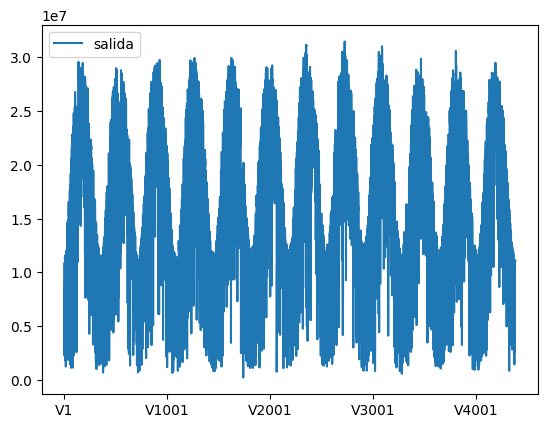

In [5]:
# Crear el gráfico
datos[['salida']].plot()
# Mostrar el gráfico
plt.show()

Vamos a ver el número de columnas y filas

In [6]:
print('Cantidad de filas y columnas: ', datos.shape)
print('Nombre de las columnas: ', datos.columns)

Cantidad de filas y columnas:  (4380, 76)
Nombre de las columnas:  Index(['apcp_sf1_1', 'apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1', 'apcp_sf5_1',
       'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1',
       'dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1',
       'pres_ms1_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1', 'pres_ms5_1',
       'pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'pwat_ea5_1',
       'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1',
       'tcdc_ea1_1', 'tcdc_ea2_1', 'tcdc_ea3_1', 'tcdc_ea4_1', 'tcdc_ea5_1',
       'tcolc_e1_1', 'tcolc_e2_1', 'tcolc_e3_1', 'tcolc_e4_1', 'tcolc_e5_1',
       'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1',
       'tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1',
       'tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1',
       'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 'tmp_sfc5_1',
       'u

Tenemos 4380 instancias en total en el dataset disponible, tenemos también, 76 columnas.

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

75 de estas columnas tienen datos de tipo coma flotante, excepto la salida, la cual, es de tipo entero.

##Valores estadísticos básicos

Vamos a comprobar los valores estadísticos básicos de cada columna, tales como la media, máximos, mínimos, percetiles... 

In [8]:
datos.describe()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,...,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,0.680864,0.295715,0.560493,0.314416,0.633132,313.273646,315.987828,323.916601,343.364923,342.400159,...,244.622084,249.168372,259.334746,258.017321,0.161146,39.177252,73.645019,117.929556,90.196824,1.563380e+07
std,2.428075,1.150189,2.004093,1.052649,2.046562,55.814758,58.638442,59.902811,63.252590,63.356754,...,37.643788,37.682334,41.063270,40.327808,0.359916,26.040578,31.372578,43.613978,35.478830,8.034871e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,155.153588,152.214722,156.433634,168.872932,169.850136,...,112.273223,120.532820,108.696960,113.352032,0.000000,0.000000,2.000000,4.181818,2.727273,2.367000e+05
25%,0.000000,0.000000,0.000000,0.000000,0.000000,267.695476,267.413078,275.156984,292.641835,291.756962,...,227.328584,230.584259,239.253765,238.054149,0.000000,14.886364,50.181818,98.181818,65.545455,9.617175e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.375947,322.670428,329.227325,346.983034,345.283217,...,249.642644,254.083740,266.566240,264.581923,0.000000,36.409091,78.000000,126.090909,95.272727,1.556790e+07
75%,0.151818,0.071136,0.176364,0.074773,0.171136,362.370395,367.887140,377.571733,399.169037,398.387048,...,273.364252,277.758348,289.760780,288.576924,0.000000,62.477273,99.909091,144.636364,118.181818,2.253825e+07
max,49.250909,22.713636,32.225454,14.722727,31.407273,419.721752,425.380085,428.193354,473.704812,467.151586,...,310.361004,315.971533,331.714963,328.803999,1.000000,91.272727,274.272727,547.545455,363.818182,3.145350e+07


##Visualización de datos

Vamos a visualizar las campanas de gauss en johnson, normal y log normal con los datos de salida y ver si cada una de ellas se acerca a nuestros datos

<ipython-input-9-25373f8428d7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.johnsonsu)
<ipython-input-9-25373f8428d7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.norm)
<ipython-input-9-25373f8428d7>:7: UserWarning: 

`distplot` is a deprecated f

<Axes: title={'center': 'Log Normal'}, xlabel='salida'>

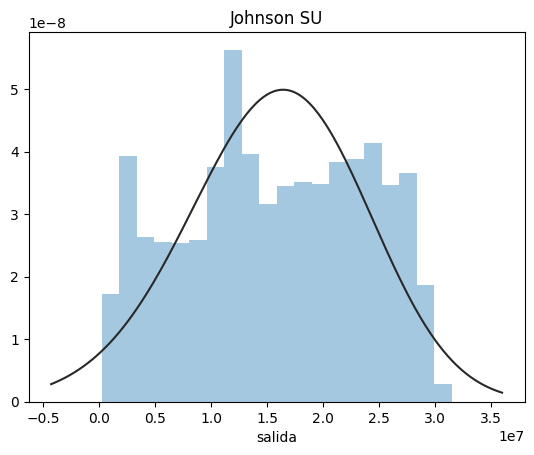

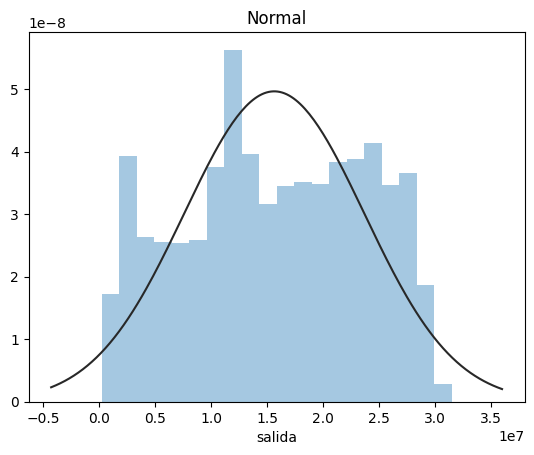

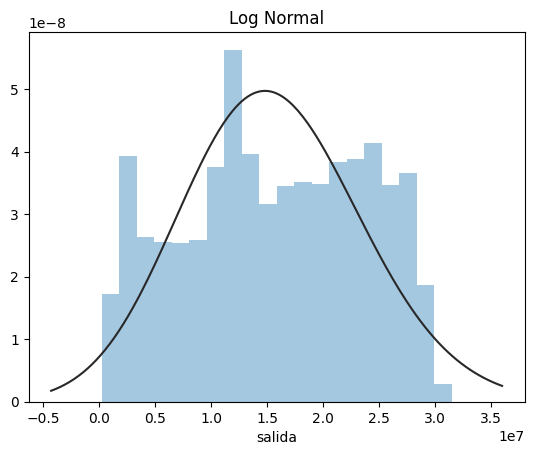

In [9]:
y = datos['salida']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

##Pairplots

En esta prueba realizamos los pairplots con los datos de salida. Cabe destacar que en las graficas en las que la linea es fina(no hay mucho cambio) se debe a que abundan ceros, como uswrf_s1_1 y dswrf_s1_1. Esta información también nos sirve para poder saber en que atributos se puede reducir la dimensionalidad del problema.

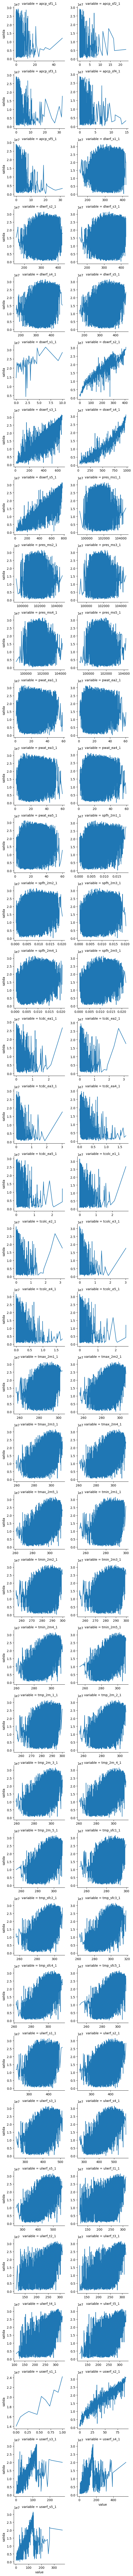

In [10]:
def pairplot(x, y, **kwargs):
  ax = plt.gca()
  ts = pd.DataFrame({'time': x, 'val': y})
  ts = ts.groupby('time').mean()
  ts.plot(ax=ax)
  plt.xticks()

f = pd.melt(datos, id_vars = ['salida'], value_vars = datos)
g = sns.FacetGrid(f, col = "variable", col_wrap = 2, sharex = False, sharey= False)
g= g.map(pairplot, "value", "salida")


## Comprobar valores nulos

A continuacion comprobaremos si existen valores nulos en alguna de las columnas

In [11]:
# Crear un dataframe a partir de la variable 'datos'
df = pd.DataFrame(datos)

# Verificar si hay valores nulos
if df.isnull().values.any():
    print("Hay valores nulos en la matriz.")
else:
    print("No hay valores nulos en la matriz.")

No hay valores nulos en la matriz.


##Valores iguales a cero

In [12]:
# Crear un DataFrame a partir de la variable 'datos'
df = pd.DataFrame(datos)

# Crear un diccionario para almacenar los resultados
ceros = {}

# Contar los valores iguales a cero en cada columna y guardarlos en el diccionario
for columna in df.columns:
    cuenta = np.sum(df[columna] == 0)
    ceros[columna] = cuenta

# Mostrar el diccionario con los contadores de ceros
for columna, cuenta in ceros.items():
    print(f"'{columna}': {cuenta}")

'apcp_sf1_1': 2534
'apcp_sf2_1': 2490
'apcp_sf3_1': 2312
'apcp_sf4_1': 2631
'apcp_sf5_1': 2480
'dlwrf_s1_1': 0
'dlwrf_s2_1': 0
'dlwrf_s3_1': 0
'dlwrf_s4_1': 0
'dlwrf_s5_1': 0
'dswrf_s1_1': 3822
'dswrf_s2_1': 3
'dswrf_s3_1': 0
'dswrf_s4_1': 0
'dswrf_s5_1': 0
'pres_ms1_1': 0
'pres_ms2_1': 0
'pres_ms3_1': 0
'pres_ms4_1': 0
'pres_ms5_1': 0
'pwat_ea1_1': 0
'pwat_ea2_1': 0
'pwat_ea3_1': 0
'pwat_ea4_1': 0
'pwat_ea5_1': 0
'spfh_2m1_1': 0
'spfh_2m2_1': 0
'spfh_2m3_1': 0
'spfh_2m4_1': 0
'spfh_2m5_1': 0
'tcdc_ea1_1': 1584
'tcdc_ea2_1': 1621
'tcdc_ea3_1': 1603
'tcdc_ea4_1': 1443
'tcdc_ea5_1': 1398
'tcolc_e1_1': 2
'tcolc_e2_1': 4
'tcolc_e3_1': 0
'tcolc_e4_1': 0
'tcolc_e5_1': 1
'tmax_2m1_1': 0
'tmax_2m2_1': 0
'tmax_2m3_1': 0
'tmax_2m4_1': 0
'tmax_2m5_1': 0
'tmin_2m1_1': 0
'tmin_2m2_1': 0
'tmin_2m3_1': 0
'tmin_2m4_1': 0
'tmin_2m5_1': 0
'tmp_2m_1_1': 0
'tmp_2m_2_1': 0
'tmp_2m_3_1': 0
'tmp_2m_4_1': 0
'tmp_2m_5_1': 0
'tmp_sfc1_1': 0
'tmp_sfc2_1': 0
'tmp_sfc3_1': 0
'tmp_sfc4_1': 0
'tmp_sfc5_1': 0
'ulwrf_

Como podemos ver, hay varias columnas que tienen bastantes ceros, por lo que en un fututo veremos que hacer con ellas.

## Comprobar filas duplicadas

Vamos a comprobar si hay filas duplicadas:




In [13]:
# Crear un DataFrame a partir de la variable 'datos'
df = pd.DataFrame(datos)

# Verificar si hay filas duplicadas
if df.duplicated().any():
    print("Hay filas duplicadas en el DataFrame.")
else:
    print("No hay filas duplicadas en el DataFrame.")

No hay filas duplicadas en el DataFrame.


Se puede ver, que no hay ninguna fila duplicada, lo cual es buena señal

##Correlacion

A continuación construimos la matriz de correlación para ver qué relevante es cada variable en la salida y para comprobar que dos variables no tengan un comportamiento muy similar(ante lo cual se eliminaría una de ellas) y con su mapa de calor, para verla mejor


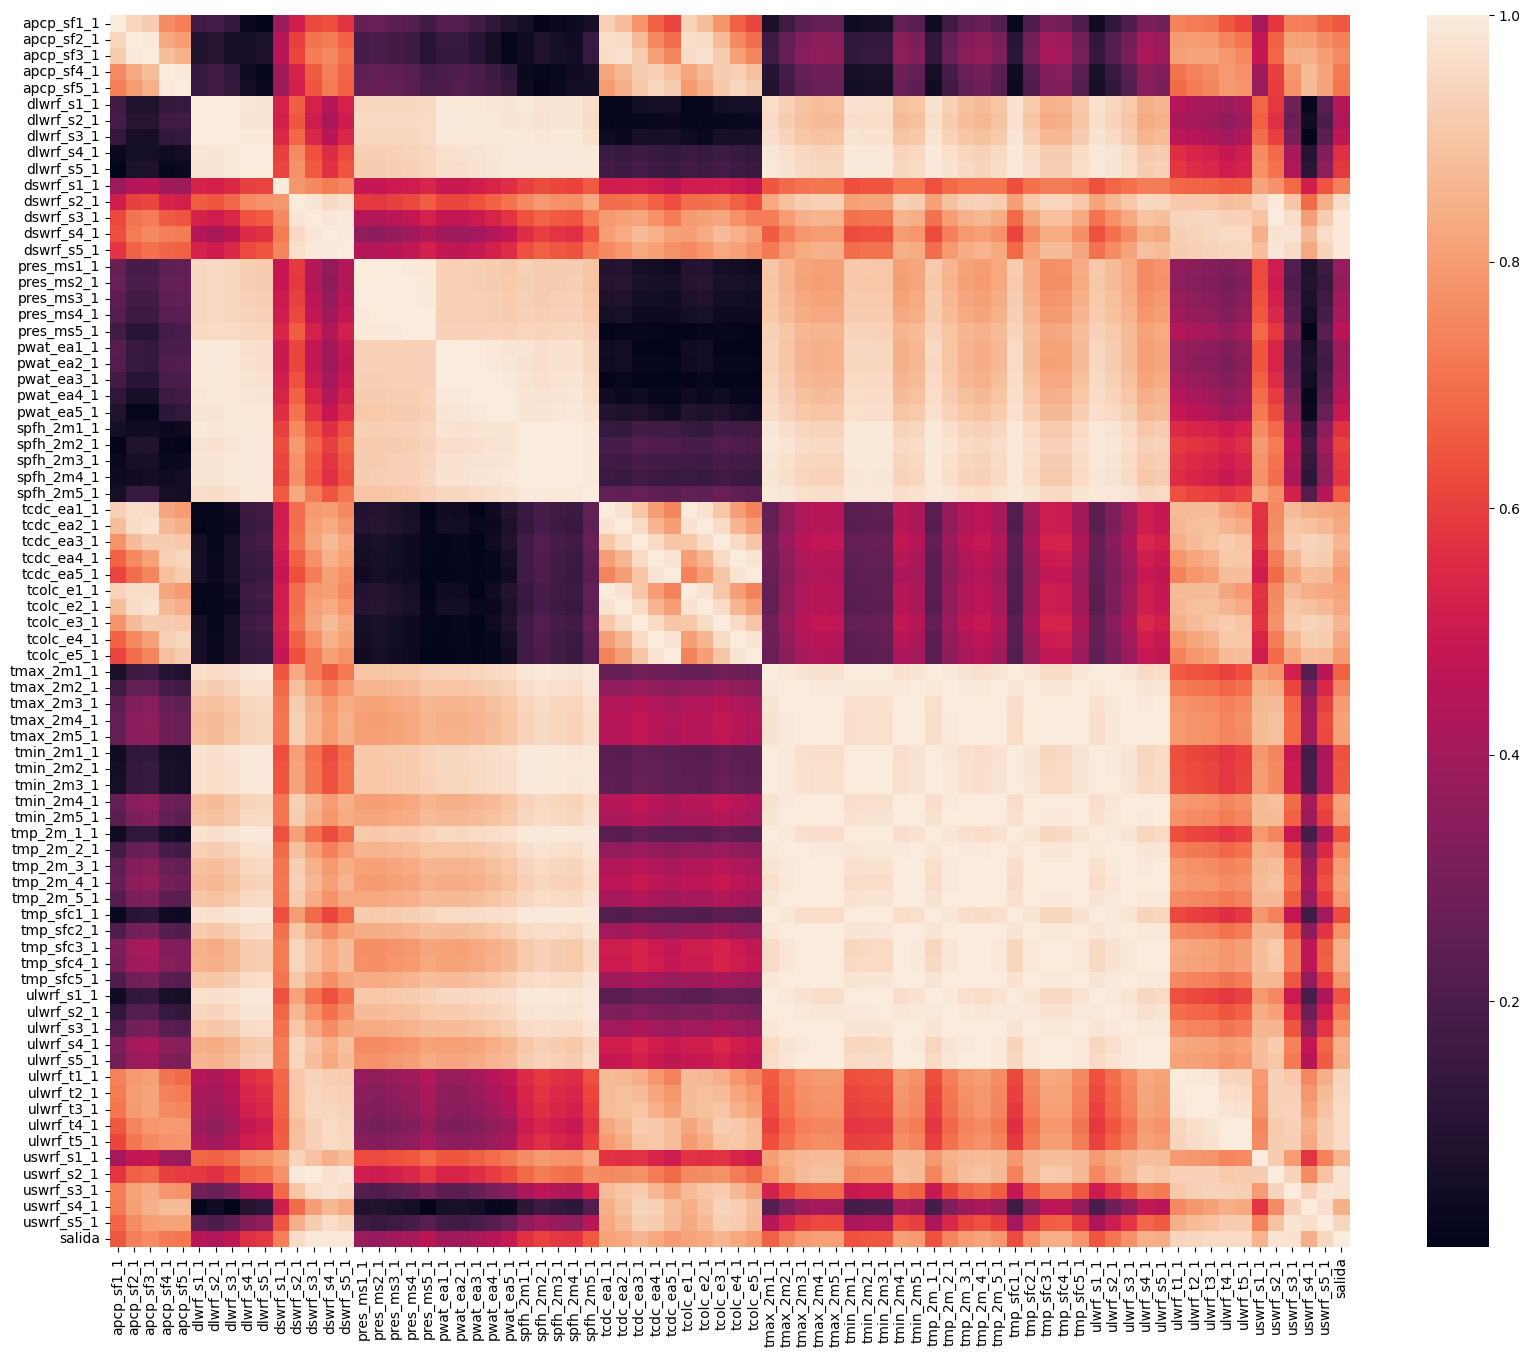

In [14]:
correlacion = datos.corr()
plt.figure(figsize=(20, 16))
plot = sns.heatmap(correlacion.corr().abs())


Vamos a ver las 5 columnas con más correlación con la columna de salida.

In [15]:
# Calcular la matriz de correlación
correlaciones = datos.corr().abs()

# Seleccionar la columna de salida y ordenar las correlaciones en orden descendente
corr_salida = correlaciones['salida'].sort_values(ascending=False)

# Tomar las 5 columnas con las correlaciones más altas
top_5 = corr_salida[1:6]  # Excluir la columna de salida

print(top_5)

dswrf_s3_1    0.865622
dswrf_s5_1    0.862388
dswrf_s4_1    0.857635
uswrf_s2_1    0.836513
dswrf_s2_1    0.817543
Name: salida, dtype: float64


Vamos a ver también las columnas con menos correlación con la salida

In [16]:
# Calcular la matriz de correlación
correlaciones = datos.corr().abs()

# Seleccionar la columna de salida y ordenar las correlaciones en orden descendente
corr_salida = correlaciones['salida'].sort_values(ascending=True)

# Tomar las 5 columnas con las correlaciones más altas
top_5 = corr_salida[1:6]  # Excluir la columna de salida

print(top_5)

pres_ms2_1    0.093000
pres_ms3_1    0.114641
pres_ms4_1    0.135502
pwat_ea1_1    0.181912
pwat_ea2_1    0.188039
Name: salida, dtype: float64


Limitamos la matriz al triangulo superior para no evaluar dos veces lo mismo

In [17]:
upper= correlacion.where(np.triu(np.ones(correlacion.shape), k=1).astype(np.bool))
upper

<ipython-input-17-dada363a1d0c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper= correlacion.where(np.triu(np.ones(correlacion.shape), k=1).astype(np.bool))


,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
apcp_sf1_1,NaN,0.601748,0.543781,0.277655,0.262666,0.264907,0.223553,0.190142,0.102332,0.085999,...,-0.357093,-0.311504,-0.172070,-0.150134,-0.067118,-0.188936,-0.244583,-0.158497,-0.130785,-0.210803
apcp_sf2_1,NaN,NaN,0.944655,0.403267,0.375560,0.218167,0.225368,0.200207,0.125191,0.110740,...,-0.422966,-0.403418,-0.265629,-0.229809,-0.057603,-0.220824,-0.316501,-0.246168,-0.207139,-0.234712
apcp_sf3_1,NaN,NaN,NaN,0.549341,0.485724,0.225110,0.237400,0.214085,0.138392,0.123163,...,-0.431491,-0.427810,-0.325865,-0.286692,-0.044330,-0.223966,-0.342563,-0.298344,-0.253546,-0.261290
apcp_sf4_1,NaN,NaN,NaN,NaN,0.898837,0.214020,0.236931,0.226005,0.180157,0.168973,...,-0.315838,-0.338565,-0.374480,-0.374391,0.007243,-0.137082,-0.252470,-0.312784,-0.281925,-0.257081
apcp_sf5_1,NaN,NaN,NaN,NaN,NaN,0.213648,0.238394,0.227495,0.189047,0.181595,...,-0.320049,-0.347333,-0.389766,-0.404853,-0.000891,-0.145067,-0.256692,-0.320720,-0.299890,-0.268527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uswrf_s2_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.880281,0.570918,0.721518,0.836513
uswrf_s3_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849519,0.889140,0.785239
uswrf_s4_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955342,0.594700
uswrf_s5_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.727169


Vamos a crear un diccionario que contenga cada columna, y las columnas con las que ésta está correlacionada

In [18]:
# Crea un diccionario para almacenar las columnas correlacionadas
correlaciones = {}

# Recorre las columnas del DataFrame
for col in datos.columns:
    # Calcula la correlación de la columna actual con las demás columnas
    corr = datos.corrwith(datos[col])

    # Crea una lista de índices de las columnas correlacionadas
    correlacion_idx = corr[(corr >0.99 ) & (corr.index != col)].index.tolist()

    # Asigna la lista de índices como valor para la clave correspondiente
    correlaciones[col] = correlacion_idx

# Imprime el diccionario con saltos de línea
for k, v in correlaciones.items():
    print(f"{k}: {v}\n")

apcp_sf1_1: []

apcp_sf2_1: []

apcp_sf3_1: []

apcp_sf4_1: []

apcp_sf5_1: []

dlwrf_s1_1: []

dlwrf_s2_1: ['dlwrf_s3_1']

dlwrf_s3_1: ['dlwrf_s2_1']

dlwrf_s4_1: ['dlwrf_s5_1']

dlwrf_s5_1: ['dlwrf_s4_1']

dswrf_s1_1: []

dswrf_s2_1: []

dswrf_s3_1: []

dswrf_s4_1: []

dswrf_s5_1: []

pres_ms1_1: []

pres_ms2_1: []

pres_ms3_1: []

pres_ms4_1: []

pres_ms5_1: []

pwat_ea1_1: []

pwat_ea2_1: []

pwat_ea3_1: []

pwat_ea4_1: []

pwat_ea5_1: []

spfh_2m1_1: []

spfh_2m2_1: []

spfh_2m3_1: []

spfh_2m4_1: []

spfh_2m5_1: []

tcdc_ea1_1: ['tcolc_e1_1']

tcdc_ea2_1: ['tcolc_e2_1']

tcdc_ea3_1: ['tcolc_e3_1']

tcdc_ea4_1: ['tcolc_e4_1']

tcdc_ea5_1: ['tcolc_e5_1']

tcolc_e1_1: ['tcdc_ea1_1']

tcolc_e2_1: ['tcdc_ea2_1']

tcolc_e3_1: ['tcdc_ea3_1']

tcolc_e4_1: ['tcdc_ea4_1']

tcolc_e5_1: ['tcdc_ea5_1']

tmax_2m1_1: ['ulwrf_s1_1']

tmax_2m2_1: ['tmp_2m_2_1', 'tmp_sfc2_1', 'ulwrf_s2_1', 'ulwrf_s3_1']

tmax_2m3_1: ['tmax_2m4_1', 'tmax_2m5_1', 'tmin_2m4_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_sfc2_1

##Outliers

En este apartado veremos los outliers de los datos disponibles. Se hacen dos pruebas buescando los outliers entre salida y otra de las variables, basandonos en el heatmap hecho anteriormente.

En la primera prueba se puede observar que hay una gran diferencia entre el límite superior e inferior, sabiendo que este atributo está poco correlado.

En la segunda prueba pasa lo contrario, los datos están muy correlados y por tanto la franja entre el límite superior e inferior es muy pequeña.

In [19]:
outliers = []
#Función para detección de outliers
def find_outliers(datos):
  data_std = datos.std()
  data_mean = datos.mean()
  outlier_cut_off = data_std * 2
  lower_limit = data_mean - outlier_cut_off
  upper_limit = data_mean + outlier_cut_off
  print(lower_limit.iloc[0])
  print(upper_limit.iloc[0])

  #Generate outliers
  for index, row in datos.iterrows():
    anomaly = row #obtenemos la primera columna
    if (anomaly.iloc[0] > upper_limit.iloc[0]) or (anomaly.iloc[0] < lower_limit.iloc[0]):
      outliers.append(index)
  
  return outliers

In [20]:
find_outliers(datos.set_index('salida')[['dswrf_s3_1']])

42.47601434120821
721.0016527405685


[1246500,
 2410200,
 1387800,
 4713600,
 1370700,
 5687100,
 1364100,
 812400,
 1951800,
 1238700,
 1695300,
 3034200,
 819300,
 1204800,
 3210300,
 1117500,
 5744700,
 1376400,
 3296100,
 861000,
 5763900,
 1889700,
 579600,
 1373100,
 2469000,
 2376600,
 2787000,
 2070300,
 936000,
 1293900,
 958800,
 2185800,
 2463000]

In [21]:
find_outliers(datos.set_index('salida')[['pres_ms2_1']])

100392.29656942967
103234.40794391873


[1246500,
 2410200,
 1387800,
 4713600,
 1370700,
 5687100,
 1364100,
 812400,
 1951800,
 1238700,
 1695300,
 3034200,
 819300,
 1204800,
 3210300,
 1117500,
 5744700,
 1376400,
 3296100,
 861000,
 5763900,
 1889700,
 579600,
 1373100,
 2469000,
 2376600,
 2787000,
 2070300,
 936000,
 1293900,
 958800,
 2185800,
 2463000,
 7300800,
 11538600,
 10642800,
 7744200,
 12014700,
 12647700,
 16540800,
 18126600,
 7092900,
 22848000,
 10392600,
 11742600,
 10438800,
 1502700,
 15774300,
 17441400,
 18007500,
 8469600,
 4205700,
 20384100,
 20690400,
 19435200,
 22902900,
 5832900,
 22794300,
 16189800,
 27989100,
 21205800,
 7797000,
 21590100,
 16225800,
 14572500,
 14883300,
 6758100,
 9026100,
 11577600,
 11128800,
 12119700,
 3039000,
 14146200,
 5683500,
 10779600,
 15336600,
 16408800,
 14487000,
 11976300,
 20482500,
 20751300,
 21121500,
 19733700,
 3051300,
 21908400,
 25302900,
 22050000,
 3253200,
 22494600,
 2186400,
 1821300,
 1364100,
 11685000,
 11086500,
 7073400,
 6918000,
 5

##Clustering

El clustering es una técnica en la que se agrupan datos similares en clusters. Con el clustering intentaremos encontrar patrones ocultos con los que se agruparán los distintos datos.

El print imprime la suma acumulada de la varianza explicada por cada uno de los componentes principales, indica cuanta información se conserva tras reducir la dimensionalidad

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9939568650258135


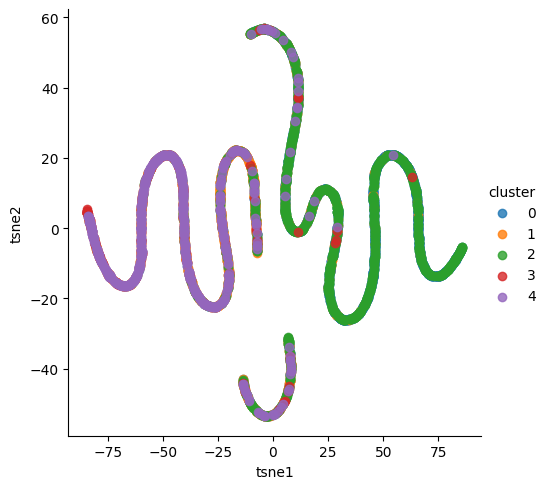

In [22]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50)
x = datos
tsne = model.fit_transform(x)

std = StandardScaler()
s = std.fit_transform(x)
pca = PCA(n_components = 25)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1':tsne[:,0], 'tsne2': tsne[:,1], 'cluster':kmeans.labels_})
sns.lmplot(data = fr, x = 'tsne1', y = 'tsne2', hue = 'cluster', fit_reg = False)
print(np.sum(pca.explained_variance_ratio_))

##Transformación Johnson


Este código define dos funciones para aplicar la transformación de Johnson y luego invertirla. Se usa para encontrar una distribución normal o una distribución que se asemeje para unos datos que no siguen una distribución normal.

<ipython-input-23-122f7ad4ba8a>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yt)


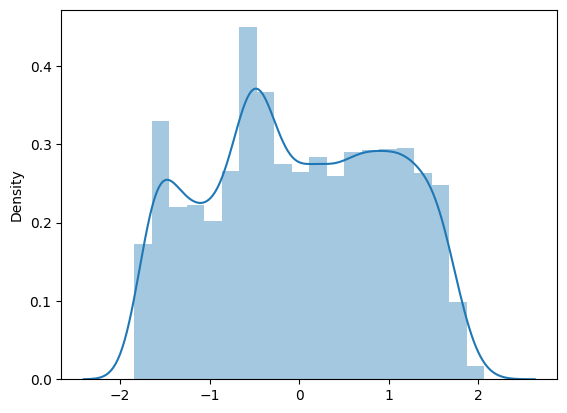

<Figure size 640x480 with 0 Axes>

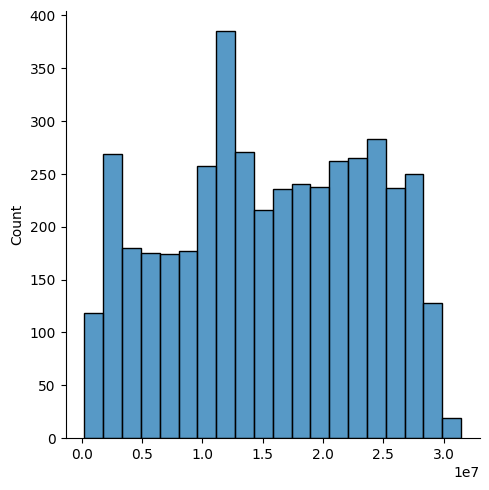

In [23]:
y = datos['salida'].values
def johnson(y):
  gamma, eta, epsilom, lbda = st.johnsonsu.fit(y)
  yt = gamma + eta * np.arcsinh((y-epsilom)/lbda)
  return yt, gamma, eta, epsilom, lbda

def johnson_inverse(y, gamma, eta, epsilom, lbda):
  return lbda*np.sinh((y-gamma)/eta) + epsilom

yt ,g , et, ep, l = johnson(y)
yt2 = johnson_inverse(yt, g, et, ep, l)
plt.figure(1)
sns.distplot(yt)
plt.figure(2)
sns.displot(yt2)

#2. Métodos básicos

##Division de los datos en train-test siendo train 10 años y test 2 años

In [24]:
X = datos[datos.columns[0:-1]]
y = datos['salida']

X_train = X[0:3650]
y_train = y[0:3650]


X_final_test = X[3651:]
y_final_test = y[3651:]


##KNN

A continuación se evaluará el modelo KNN con los hiperparámetros por omision

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import PredefinedSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

#ajustamos los datos a la pipeline
start = time.time() 
pipe.fit(X_train_train, y_train_train)
end = time.time()
total = end-start

# Predict on the scaled test data
y_pred = pipe.predict(X_train_val)

# Evaluate the model
print(f"Execution time: {total} seconds")
rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))
print(f"RMSE del modelo: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo: {mae}")

Execution time: 0.011064291000366211 seconds
RMSE del modelo: 3634700.7339596236
MAE del modelo: 2576600.074520548


A continuacion comprobaremos KNN con varios hiperpárametros diferentes. Separamos los cálculos del mae y rmse, ya que en gridsearch hay que elegir entre neg_mean_squared_error y neg_mean_absolute_error

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

arr = [-1]*2920 + [0]*730

# Define la lista de posibles valores de vecinos
vecinos = [1, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15]

# Utiliza un bucle para evaluar el modelo con diferentes valores de vecinos

inner = PredefinedSplit(test_fold = arr)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(pipe, 
                   param_grid = {'kneighborsregressor__n_neighbors': vecinos},
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Entrena el modelo con el número óptimo de vecinos y evalúa en el conjunto de evaluación
start = time.time()
regr.fit(X = X_train, y = y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE del modelo: {np.sqrt(-regr.best_score_)}")

Fitting 1 folds for each of 11 candidates, totalling 11 fits
Execution time: 0.5780377388000488 seconds
RMSE del modelo: 3431363.1618326935


In [27]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

arr = [-1]*2920 + [0]*730

# Define la lista de posibles valores de vecinos
vecinos = [1, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15]

# Utiliza un bucle para evaluar el modelo con diferentes valores de vecinos

inner = PredefinedSplit(test_fold = arr)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(pipe, 
                   param_grid = {'kneighborsregressor__n_neighbors': vecinos},
                   scoring='neg_mean_absolute_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Entrena el modelo con el número óptimo de vecinos y evalúa en el conjunto de evaluación
start = time.time()
regr.fit(X = X_train, y = y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"MAE del modelo: {-regr.best_score_}")

Fitting 1 folds for each of 11 candidates, totalling 11 fits
Execution time: 0.33989500999450684 seconds
MAE del modelo: 2434502.970958904


Hemos realizado la cross validation probando con una lista de vecinos, en la cual el numero mas alto era 9. Al haber sido este, el mejor valor para los vecinos propuestos, procedemos a aumentar los numeros de la lista, esperando encontrar un número mayor más óptimo


##Arboles de decisión

A continuación se evaluará el modelo de árboles de decisión por omision.

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())


np.random.seed(27) # reproducibility

#ajustamos los datos a la pipeline 
start = time.time()
pipe.fit(X_train_train, y_train_train)
end = time.time()
total = end-start

# Predict on the scaled test data
y_pred = pipe.predict(X_train_val)


# Evaluate the model
print(f"Execution time: {total} seconds")
rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))
print(f"RMSE del modelo: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo: {mae}")

Execution time: 0.2112579345703125 seconds
RMSE del modelo: 4279973.04174393
MAE del modelo: 3009932.8767123288


Ahora veremos qué hiperparámetros son los mejores utilizando la técnica de gridSearch 


In [29]:
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())

np.random.seed(27) # reproducibility

# Search space
param_grid = {'max_depth': list(range(2,6)),
              'min_samples_split': list(range(2,6))}

array_fold = [-1]*2920 + [0]*730
inner = PredefinedSplit(test_fold = array_fold)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)


# Train the self-adjusting process
np.random.seed(27)
start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE del modelo: {np.sqrt(-regr.best_score_)}")

Fitting 1 folds for each of 16 candidates, totalling 16 fits
Execution time: 1.2610957622528076 seconds
RMSE del modelo: 3578304.8192169834


In [30]:
pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())

np.random.seed(27) # reproducibility

# Search space
param_grid = {'max_depth': list(range(2,6)),
              'min_samples_split': list(range(2,6))}

array_fold = [-1]*2920 + [0]*730
inner = PredefinedSplit(test_fold = array_fold)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)


# Train the self-adjusting process
np.random.seed(27)
start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"MAE del modelo: {-regr.best_score_}")

Fitting 1 folds for each of 16 candidates, totalling 16 fits
Execution time: 1.2473585605621338 seconds
MAE del modelo: 2600603.4477080866


Vamos a probar otro método para ajustar los hiperparámetros llamado randomSearch

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())

np.random.seed(27) # reproducibility

# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(2,16,2))}

# Inner evaluation
inner = KFold(n_splits=3)

budget = 20
regr = RandomizedSearchCV(DecisionTreeRegressor(), 
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )
np.random.seed(27)
start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE del modelo: {np.sqrt(-regr.best_score_)}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Execution time: 6.087932109832764 seconds
RMSE del modelo: 3801988.296426137


In [32]:
pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())

np.random.seed(27) # reproducibility

# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(2,16,2))}

# Inner evaluation
inner = KFold(n_splits=3)

budget = 20
regr = RandomizedSearchCV(DecisionTreeRegressor(), 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )
np.random.seed(27)
start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"MAE del modelo: {-regr.best_score_}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Execution time: 6.866957187652588 seconds
MAE del modelo: 2694180.546480335


##Regresión lineal

A continuación probaremos a hacer un modelo de regresión lineal por omisión

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

linear = make_pipeline(StandardScaler(), LinearRegression())

np.random.seed(20)

start_time = time.time()
linear.fit(X_train_train, y_train_train)
end_time = time.time()

total_time = end_time - start_time
print(f'total time = {total_time}')

rmse = np.sqrt(metrics.mean_squared_error(y_train_val, linear.predict(X=X_train_val)))
print(f"RMSE del modelo: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo: {mae}")

total time = 0.021610021591186523
RMSE del modelo: 3092160.5617226223
MAE del modelo: 3009932.8767123288


##Ridge

Vamos a probar con Ridge por omisión.

In [34]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

linear = make_pipeline(StandardScaler(), Ridge())

np.random.seed(27)

start_time = time.time()
linear.fit(X_train_train, y_train_train)
end_time = time.time()

total_time = end_time - start_time
print(f'total time = {total_time}')

rmse = np.sqrt(metrics.mean_squared_error(y_train_val, linear.predict(X=X_train_val)))
print(f"RMSE del modelo: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo: {mae}")

total time = 0.021251201629638672
RMSE del modelo: 3086449.363411044
MAE del modelo: 3009932.8767123288


Vamos a probar con ridge con ajuste de hiperparámetros, los cuales vamos a probar para que de el mejor resultado en el menor tiempo.
Los hiperparámetros que hay ahora son los mejores que hemos podido probar.

In [35]:
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import time
linear = Ridge()

arr = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = arr)

param_grid = {'alpha':[.0001, 0.001], 'fit_intercept':[True,False], 'solver':['auto']}

regr = GridSearchCV(linear, param_grid, scoring='neg_mean_squared_error', cv=inner, n_jobs = 1)

np.random.seed(27)

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

total_time = end_time - start_time
print(f"Total execution time: {total_time} seconds")

print(f"RMSE of ridge: {np.sqrt(-regr.best_score_)}")

Total execution time: 0.07944464683532715 seconds
RMSE of ridge: 3088341.789748857


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.45366e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.89994e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [36]:
linear = Ridge()

arr = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = arr)

param_grid = {'alpha':[.0001, 0.001], 'fit_intercept':[True,False], 'solver':['auto']}

regr = GridSearchCV(linear, param_grid, scoring='neg_mean_absolute_error', cv=inner, n_jobs = 1)

np.random.seed(27)

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

total_time = end_time - start_time
print(f"Total execution time: {total_time} seconds")

print(f"MAE of ridge: {-regr.best_score_}")

Total execution time: 0.048229217529296875 seconds
MAE of ridge: 2248396.362977969


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.45366e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.89994e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


##Lasso

Probamos Lasso por omisión. 

In [37]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

linear = Lasso()
np.random.seed(27)

start_time = time.time()
linear.fit(X_train_train, y_train_train)
end_time = time.time()

total_time = end_time - start_time
print(f'total time = {total_time}')

rmse = np.sqrt(metrics.mean_squared_error(y_train_val, linear.predict(X=X_train_val)))
print(f"RMSE del modelo: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo: {mae}")

total time = 0.21481823921203613
RMSE del modelo: 3091012.8695496893
MAE del modelo: 3009932.8767123288


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.619e+16, tolerance: 1.926e+13
  model = cd_fast.enet_coordinate_descent(


Ahora probamos Lasso con ajuste de hiperparámetros.

In [38]:
linear = Lasso()

arr = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = arr)

param_grid = {'alpha':[0.0001], 'fit_intercept':[True,False], 'positive':[True,False], 'selection':['cyclic','random']}

regr = GridSearchCV(linear, param_grid, scoring='neg_mean_squared_error', cv=inner, n_jobs = 1)

np.random.seed(27)

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

total_time = end_time - start_time
print(f"Total execution time: {total_time} seconds")

print(f"RMSE of Lasso: {np.sqrt(-regr.best_score_)}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+16, tolerance: 1.926e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+16, tolerance: 1.926e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.619e+16, tolerance: 1.926e+13

Total execution time: 1.3992817401885986 seconds
RMSE of Lasso: 3091791.0122240894


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.958e+16, tolerance: 2.387e+13
  model = cd_fast.enet_coordinate_descent(


In [39]:
linear = Lasso()

arr = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = arr)

param_grid = {'alpha':[.0001, 0.001 , 0.01, 0.01 , 1], 'fit_intercept':[True,False], 'positive':[True,False], 'selection':['cyclic','random']}

regr = GridSearchCV(linear, param_grid, scoring='neg_mean_absolute_error', cv=inner, n_jobs = 1)

np.random.seed(27)

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

total_time = end_time - start_time
print(f"Total execution time: {total_time} seconds")

print(f"Mae of Lasso: {-regr.best_score_}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+16, tolerance: 1.926e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+16, tolerance: 1.926e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.619e+16, tolerance: 1.926e+13

Total execution time: 6.343129873275757 seconds
Mae of Lasso: 2240435.863178562


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.958e+16, tolerance: 2.387e+13
  model = cd_fast.enet_coordinate_descent(


##Conclusiones

Como podemos ver en los tiempos de ejecución de los modelos, los modelos por omisión han sido los más rápidos, ya que han tardado una fracción de segundo, ya que si poníamos más valores en los hiperparámetros, los modelos con ajuste de hiperparámetros tardaban bastante más. Esto se debe a que los modelos con ajuste de hiperparámetros tienen que realizar muchos más calculos y tiene muchas más interacciones al tener que comprobar los distintos valores.

Respecto al valor que nos da el rmse, hemos comprobado que la mejor interacción la da el modelo de ridge por omisión, ya que el valor es este 3086449.363411044, el cual es bastante mejor que algunos vistos antriormente.

No hemos podido demostrar que haya una correlación entre el tiempo de ejecución y el resultado, ya que modelos como el de árboles de decisión por omisión, que han tardado más que el ridge por omisión y da un resultado mucho peor.

En relación tiempo-resultado, hemos concluido que el mejor modelo es ridge por omisión, ya que da el mejor resultado y da el menor número de tiempo.

También podemos concluir que el peor modelo es árboles de decisión por omisión, ya que el rmse es notablemente mayor.

#3. Dimensionalidad

Para ver si se puede reducir la dimensionalidad, tenemos que tener en cuenta a lo que a esto se refiere.
La reducción de dimensionalidad trata de hacer un problema menos complejo, mediante la reducción de variables etre otras, intentando no empeorar los resultados.

Esto lo podemos conseguir de forma facil. Un ejemplo de ello sería comprobar la correlación de las distintas columnas, o ver si hay columnas con datos nulos.

##Datos

Volvemos a recordar nuestra tabla de datos

In [40]:
datos

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,279.583582,244.150732,248.810849,260.377672,257.922896,...,246.504475,250.123907,256.887859,252.522390,0.0,10.000000,46.545455,96.000000,63.000000,10814100
V2,0.000000,0.000000,0.010000,0.056364,0.332727,241.907687,273.096852,289.982095,317.169015,309.656355,...,205.821899,202.754549,190.833872,193.689280,0.0,3.909091,17.909091,35.909091,24.000000,3524700
V3,0.372727,0.021818,0.044545,0.010000,0.007273,266.370911,248.814203,253.860367,269.438213,262.840130,...,232.919646,234.298932,207.450058,201.529466,0.0,14.727273,78.363636,156.818182,99.090909,2262300
V4,0.002727,0.004545,0.000000,0.000000,0.000000,246.863048,254.987450,253.493584,243.910921,238.531321,...,231.098594,234.944027,247.745764,241.867405,0.0,7.545455,38.727273,93.909091,62.363636,2414100
V5,0.000000,0.000000,0.000000,0.000000,0.000000,225.253657,233.381596,241.669004,262.122700,262.209190,...,228.161205,229.680077,246.582735,245.473409,0.0,9.454545,44.454545,94.818182,62.363636,8925600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.103636,0.031818,0.275455,1.363636,2.723636,290.259560,273.578697,290.364211,336.500117,329.825229,...,244.348444,237.416203,184.462400,184.607586,0.0,7.454545,29.363636,26.181818,16.181818,2586300
V4377,0.042727,0.011818,0.005455,0.000000,0.000000,281.187456,270.918392,261.076105,257.875871,255.614019,...,245.674612,249.425982,259.792969,256.932908,0.0,12.181818,57.909091,118.363636,75.909091,7096500
V4378,0.000000,0.000000,0.000000,0.000000,0.000000,258.991619,266.566642,270.990501,285.661122,282.533206,...,227.978506,236.917554,268.096311,269.024766,0.0,8.272727,44.454545,94.909091,61.909091,10694700
V4379,0.000000,0.000000,0.000000,0.000000,0.000000,267.316595,263.072063,271.107649,292.155748,289.533175,...,262.343628,256.254039,263.650323,268.711556,0.0,10.909091,46.181818,94.363636,61.727273,11154900


##Columnas con muchos ceros

Anteriormente habíamos calculado el número de ceros de cada columna, lo vamos a recuperar y decidiremos si quitamos alguno de esas columnas.

In [41]:
ceros

{'apcp_sf1_1': 2534,
 'apcp_sf2_1': 2490,
 'apcp_sf3_1': 2312,
 'apcp_sf4_1': 2631,
 'apcp_sf5_1': 2480,
 'dlwrf_s1_1': 0,
 'dlwrf_s2_1': 0,
 'dlwrf_s3_1': 0,
 'dlwrf_s4_1': 0,
 'dlwrf_s5_1': 0,
 'dswrf_s1_1': 3822,
 'dswrf_s2_1': 3,
 'dswrf_s3_1': 0,
 'dswrf_s4_1': 0,
 'dswrf_s5_1': 0,
 'pres_ms1_1': 0,
 'pres_ms2_1': 0,
 'pres_ms3_1': 0,
 'pres_ms4_1': 0,
 'pres_ms5_1': 0,
 'pwat_ea1_1': 0,
 'pwat_ea2_1': 0,
 'pwat_ea3_1': 0,
 'pwat_ea4_1': 0,
 'pwat_ea5_1': 0,
 'spfh_2m1_1': 0,
 'spfh_2m2_1': 0,
 'spfh_2m3_1': 0,
 'spfh_2m4_1': 0,
 'spfh_2m5_1': 0,
 'tcdc_ea1_1': 1584,
 'tcdc_ea2_1': 1621,
 'tcdc_ea3_1': 1603,
 'tcdc_ea4_1': 1443,
 'tcdc_ea5_1': 1398,
 'tcolc_e1_1': 2,
 'tcolc_e2_1': 4,
 'tcolc_e3_1': 0,
 'tcolc_e4_1': 0,
 'tcolc_e5_1': 1,
 'tmax_2m1_1': 0,
 'tmax_2m2_1': 0,
 'tmax_2m3_1': 0,
 'tmax_2m4_1': 0,
 'tmax_2m5_1': 0,
 'tmin_2m1_1': 0,
 'tmin_2m2_1': 0,
 'tmin_2m3_1': 0,
 'tmin_2m4_1': 0,
 'tmin_2m5_1': 0,
 'tmp_2m_1_1': 0,
 'tmp_2m_2_1': 0,
 'tmp_2m_3_1': 0,
 'tmp_2m_4_1'

Las columnas con más del 75% de ceros son :
dswrf_s1_1 y uswrf_s1_1. Estas serán borradas en el próximo apartado para poder seguir teniendo en cuenta todas las columnas.

##Correlación

Primero vamos a volver a ver todos los datos en una gráfica

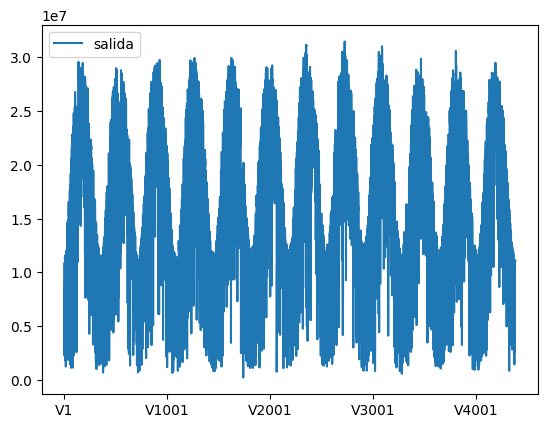

In [42]:
# Crear el gráfico
datos[['salida']].plot()
# Mostrar el gráfico
plt.show()

Tras comprobar anteriormente las 5 columnas con más correlación con la columna de salida, vamos a verlas de nuevo. Esto nos servirá para determinar si estas han cambiado tras hacer drop de las columnas

In [43]:
# Calcular la matriz de correlación
correlaciones = datos.corr()

# Seleccionar la columna de salida y ordenar las correlaciones en orden descendente
corr_salida = correlaciones['salida'].sort_values(ascending=False)

# Tomar las 5 columnas con las correlaciones más altas
top_5 = corr_salida[1:6]  # Excluir la columna de salida

print(top_5)

dswrf_s3_1    0.865622
dswrf_s5_1    0.862388
dswrf_s4_1    0.857635
uswrf_s2_1    0.836513
dswrf_s2_1    0.817543
Name: salida, dtype: float64


Borramos las columnas con muchos ceros

In [44]:
datos.drop(['uswrf_s1_1','dswrf_s1_1'], axis=1)

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,279.583582,244.150732,248.810849,260.377672,257.922896,...,192.516803,246.504475,250.123907,256.887859,252.522390,10.000000,46.545455,96.000000,63.000000,10814100
V2,0.000000,0.000000,0.010000,0.056364,0.332727,241.907687,273.096852,289.982095,317.169015,309.656355,...,231.473054,205.821899,202.754549,190.833872,193.689280,3.909091,17.909091,35.909091,24.000000,3524700
V3,0.372727,0.021818,0.044545,0.010000,0.007273,266.370911,248.814203,253.860367,269.438213,262.840130,...,210.473835,232.919646,234.298932,207.450058,201.529466,14.727273,78.363636,156.818182,99.090909,2262300
V4,0.002727,0.004545,0.000000,0.000000,0.000000,246.863048,254.987450,253.493584,243.910921,238.531321,...,227.330324,231.098594,234.944027,247.745764,241.867405,7.545455,38.727273,93.909091,62.363636,2414100
V5,0.000000,0.000000,0.000000,0.000000,0.000000,225.253657,233.381596,241.669004,262.122700,262.209190,...,229.641681,228.161205,229.680077,246.582735,245.473409,9.454545,44.454545,94.818182,62.363636,8925600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.103636,0.031818,0.275455,1.363636,2.723636,290.259560,273.578697,290.364211,336.500117,329.825229,...,224.630457,244.348444,237.416203,184.462400,184.607586,7.454545,29.363636,26.181818,16.181818,2586300
V4377,0.042727,0.011818,0.005455,0.000000,0.000000,281.187456,270.918392,261.076105,257.875871,255.614019,...,245.591119,245.674612,249.425982,259.792969,256.932908,12.181818,57.909091,118.363636,75.909091,7096500
V4378,0.000000,0.000000,0.000000,0.000000,0.000000,258.991619,266.566642,270.990501,285.661122,282.533206,...,240.584692,227.978506,236.917554,268.096311,269.024766,8.272727,44.454545,94.909091,61.909091,10694700
V4379,0.000000,0.000000,0.000000,0.000000,0.000000,267.316595,263.072063,271.107649,292.155748,289.533175,...,268.409674,262.343628,256.254039,263.650323,268.711556,10.909091,46.181818,94.363636,61.727273,11154900


Tras comprobar la correlación al principio del archivo, ahora comprobamos las columnas que hay que borrar.

Tras realizar a mano, las comprobaciones de las columnas que estaban correlacionadas, y tras eliminar una de las 2 que estuvieran correlacionadas, se traslado dicho procedimiento a código

In [45]:
# Lista de columnas a eliminar
#cols_to_drop = ['dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s5_1', 'dswrf_s2_1', 'dswrf_s5_1', 'pres_ms2_1', 'pres_ms3_1', 
 #               'pres_ms4_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 
  #              'tcdc_ea1_1', 'tcdc_ea2_1', 'tcdc_ea3_1', 'tcdc_ea4_1', 'tcdc_ea5_1', 'ulwrf_t2_1', 'ulwrf_t4_1', 
   #             'uswrf_s2_1', 'uswrf_s4_1', 'tmax_2m2_1', 'tmp_2m_2_1', 'tmp_sfc2_1', 'ulwrf_s3_1', 'ulwrf_s2_1', 
    #            'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1', 'tmin_2m4_1', 'tmin_2m5_1', 'tmax_2m1_1', 'tmin_2m2_1', 
     #           'tmin_2m3_1', 'tmp_sfc1_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 
      #          'tmp_sfc5_1', 'ulwrf_s4_1', 'ulwrf_s5_1', 'tmin_2m1_1', 'tmp_2m_1_1']
cols_to_drop=['dlwrf_s2_1', 'dlwrf_s4_1', 'tcdc_ea1_1', 'tcdc_ea3_1', 'tcdc_ea5_1', 'tcolc_e2_1',
              'tcolc_e4_1', 'tmp_2m_4_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmin_2m1_1', 'tmp_sfc1_1',
              'ulwrf_s5_1', 'ulwrf_s2_1', 'ulwrf_s3_1', 'ulwrf_s1_1', 'tmax_2m2_1', 'tmax_2m5_1',
              'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m5_1', 'ulwrf_s4_1', 'tmp_sfc5_1', 'tmp_sfc2_1']
# Elimina las columnas especificadas
datos = datos.drop(cols_to_drop, axis=1)

Tras borrar las columnas, vamos a volver a comprobar el resto de columnas, para ver si hay alguna columna que nos hayamos dejado.

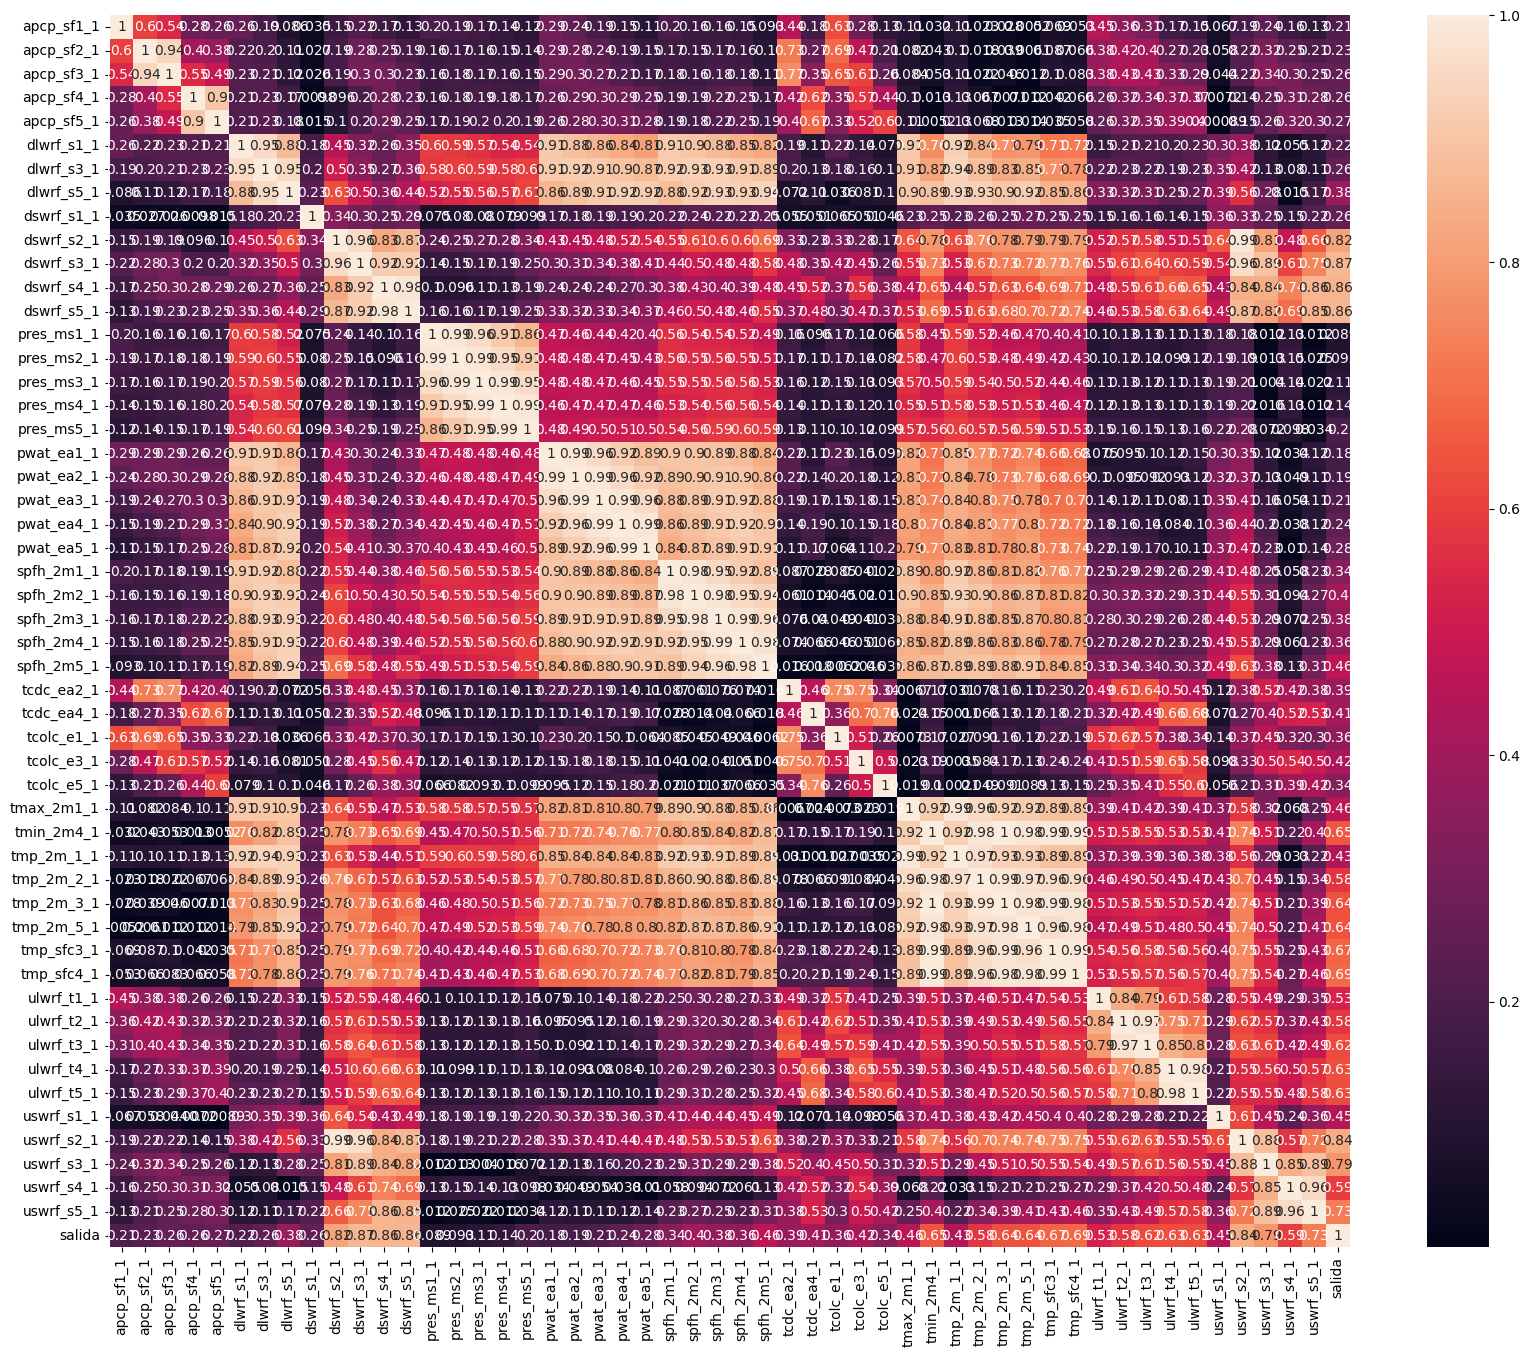

In [46]:
correlacion = datos.corr()
plt.figure(figsize=(20, 16))
plot = sns.heatmap(correlacion.abs(), annot = True)


Tras borrar los datos, volvemos a comprobar las columnas que están más relacionadas.

In [47]:
# Calcular la matriz de correlación
correlaciones = datos.corr().abs()

# Seleccionar la columna de salida y ordenar las correlaciones en orden descendente
corr_salida = correlaciones['salida'].sort_values(ascending=False)

# Tomar las 5 columnas con las correlaciones más altas
top_5 = corr_salida[1:6]  # Excluir la columna de salida

print(top_5)

dswrf_s3_1    0.865622
dswrf_s5_1    0.862388
dswrf_s4_1    0.857635
uswrf_s2_1    0.836513
dswrf_s2_1    0.817543
Name: salida, dtype: float64


Podemos ver que no han cambiado las columnas que están más correlaconadas con la columna de salida, esto es buena señal, ya qu

A continuacion se volverá a mostrar la gráfica de los datos

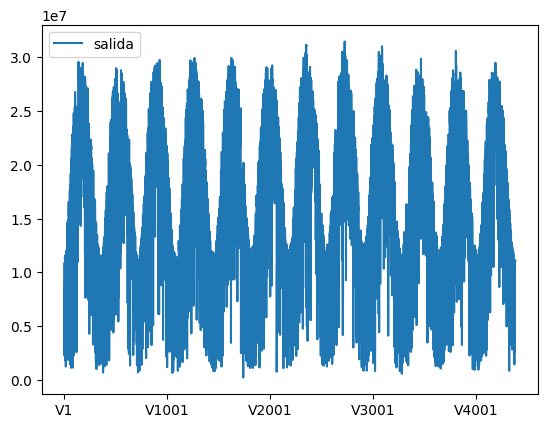

In [48]:
# Crear el gráfico
datos[['salida']].plot()

# Mostrar el gráfico
plt.show()

Tras esto hemos reducido la dimensionalidad considerablemente, ahora debería ser más rápido y menos complejo.

## Métodos básicos tras reducir la dimensionalidad.

Tras reducir la dimensionalidad, esperaremos menores tiempos de ejecución y resultados con un rmse un pelín superior.

### Train - Test

De nuevo tenemos que seccionar el espacio

In [49]:
X = datos[datos.columns[0:-1]]
y = datos['salida']

X_train = X[0:3650]
y_train = y[0:3650]


X_final_test = X[3651:]
y_final_test = y[3651:]


###KNN

A continuación se evaluará el modelo KNN con los hiperparámetros por omision

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import PredefinedSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

#ajustamos los datos a la pipeline
start = time.time() 
pipe.fit(X_train_train, y_train_train)
end = time.time()
total = end-start

# Predict on the scaled test data
y_pred = pipe.predict(X_train_val)

# Evaluate the model
print(f"Execution time: {total} seconds")
rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))
print(f"RMSE del modelo: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo: {mae}")

Execution time: 0.00705718994140625 seconds
RMSE del modelo: 3710183.2469626567
MAE del modelo: 2618714.6038356167


A continuacion comprobaremos KNN con varios hiperpárametros diferentes

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

arr = [-1]*2920 + [0]*730

# Define la lista de posibles valores de vecinos
vecinos = [1, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15]

# Utiliza un bucle para evaluar el modelo con diferentes valores de vecinos

inner = PredefinedSplit(test_fold = arr)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(pipe, 
                   param_grid = {'kneighborsregressor__n_neighbors': vecinos},
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Entrena el modelo con el número óptimo de vecinos y evalúa en el conjunto de evaluación
start = time.time()
regr.fit(X = X_train, y = y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE del modelo: {np.sqrt(-regr.best_score_)}")

Fitting 1 folds for each of 11 candidates, totalling 11 fits
Execution time: 0.34000062942504883 seconds
RMSE del modelo: 3455248.8514357526


In [52]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

arr = [-1]*2920 + [0]*730

# Define la lista de posibles valores de vecinos
vecinos = [1, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15]

# Utiliza un bucle para evaluar el modelo con diferentes valores de vecinos

inner = PredefinedSplit(test_fold = arr)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(pipe, 
                   param_grid = {'kneighborsregressor__n_neighbors': vecinos},
                   scoring='neg_mean_absolute_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Entrena el modelo con el número óptimo de vecinos y evalúa en el conjunto de evaluación
start = time.time()
regr.fit(X = X_train, y = y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"MAE del modelo: {-regr.best_score_}")

Fitting 1 folds for each of 11 candidates, totalling 11 fits
Execution time: 0.2895481586456299 seconds
MAE del modelo: 2454972.4515068494


Hemos realizado la cross validation probando con una lista de vecinos, en la cual el numero mas alto era 9. Al haber sido este, el mejor valor para los vecinos propuestos, procedemos a aumentar los numeros de la lista, esperando encontrar un número mayor más óptimo


###Arboles de decisión

A continuación se evaluará el modelo de árboles de decisión con los hiperparámetros por omision

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())


np.random.seed(27) # reproducibility

#ajustamos los datos a la pipeline 
start = time.time()
pipe.fit(X_train_train, y_train_train)
end = time.time()
total = end-start

# Predict on the scaled test data
y_pred = pipe.predict(X_train_val)


# Evaluate the model
print(f"Execution time: {total} seconds")
rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))
print(f"RMSE del modelo: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo: {mae}")

Execution time: 0.14713549613952637 seconds
RMSE del modelo: 4488482.118350347
MAE del modelo: 3118497.1726027397


Ahora veremos qué hiperparámetros son los mejores utilizando la técnica de gridSearch 


In [54]:
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())

np.random.seed(27) # reproducibility

# Search space
param_grid = {'max_depth': list(range(2,10)),
              'min_samples_split': list(range(2,10))}

array_fold = [-1]*2920 + [0]*730
inner = PredefinedSplit(test_fold = array_fold)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)


# Train the self-adjusting process
np.random.seed(27)
start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE del modelo: {np.sqrt(-regr.best_score_)}")

Fitting 1 folds for each of 64 candidates, totalling 64 fits
Execution time: 4.709739923477173 seconds
RMSE del modelo: 3578304.8192169834


In [55]:
pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())

np.random.seed(27) # reproducibility

# Search space
param_grid = {'max_depth': list(range(2,10)),
              'min_samples_split': list(range(2,10))}

array_fold = [-1]*2920 + [0]*730
inner = PredefinedSplit(test_fold = array_fold)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)


# Train the self-adjusting process
np.random.seed(27)
start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"MAE del modelo: {-regr.best_score_}")

Fitting 1 folds for each of 64 candidates, totalling 64 fits
Execution time: 4.397020578384399 seconds
MAE del modelo: 2561451.693919586


Vamos a probar otro método para ajustar los hiperparámetros llamado randomSearch

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())

np.random.seed(27) # reproducibility

# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(2,16,2))}

# Inner evaluation
inner = KFold(n_splits=3)

budget = 20
regr = RandomizedSearchCV(DecisionTreeRegressor(), 
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )
np.random.seed(27)
start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE del modelo: {np.sqrt(-regr.best_score_)}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Execution time: 4.1803061962127686 seconds
RMSE del modelo: 3806787.3369141915


In [57]:
pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())

np.random.seed(27) # reproducibility

# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(2,16,2))}

# Inner evaluation
inner = KFold(n_splits=3)

budget = 20
regr = RandomizedSearchCV(DecisionTreeRegressor(), 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )
np.random.seed(27)
start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"MAE del modelo: {-regr.best_score_}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Execution time: 4.636558771133423 seconds
MAE del modelo: 2709634.006721553


###Regresión lineal


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

linear = make_pipeline(StandardScaler(), LinearRegression())

np.random.seed(27)

start_time = time.time()
linear.fit(X_train_train, y_train_train)
end_time = time.time()

total_time = end_time - start_time
print(f'total time = {total_time}')

rmse = np.sqrt(metrics.mean_squared_error(y_train_val, linear.predict(X=X_train_val)))
print(f"RMSE del modelo: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo: {mae}")

total time = 0.01951003074645996
RMSE del modelo: 3128813.117334253
MAE del modelo: 3118497.1726027397


###Ridge

Probamos ridge por omisión

In [59]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

linear = make_pipeline(StandardScaler(), Ridge())

np.random.seed(27)

start_time = time.time()
linear.fit(X_train_train, y_train_train)
end_time = time.time()

total_time = end_time - start_time
print(f'total time = {total_time}')

rmse = np.sqrt(metrics.mean_squared_error(y_train_val, linear.predict(X=X_train_val)))
print(f"RMSE del modelo: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo: {mae}")

total time = 0.01468658447265625
RMSE del modelo: 3127319.013739634
MAE del modelo: 3118497.1726027397


Ahora probaremos ridge con hiperparámetros.

In [60]:
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

linear = Ridge()

arr = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = arr)

param_grid = {'alpha':[0.000001, 0.0000001], 'fit_intercept':[True,False], 'solver':['auto']}

regr = GridSearchCV(linear, param_grid, scoring='neg_mean_squared_error', cv=inner, n_jobs = 1)

np.random.seed(27)

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

total_time = end_time - start_time
print(f"Total execution time: {total_time} seconds")

print(f"RMSE of ridge: {np.sqrt(-regr.best_score_)}")

Total execution time: 0.05222296714782715 seconds
RMSE of ridge: 3128768.96950827


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.88968e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.83808e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Tras probar distintos hiperparámetros, he determinado que he escrito los mejores. El hiperparámetro 'alpha' es mejor, cuanto más bajo es, pero el cambio en el resultado es tan pequeño a partir de 0.00001, que no merece la pena seguir añadiendo ceros.

In [61]:
linear = Ridge()

arr = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = arr)

param_grid = {'alpha':[0.000001, 0.0000001], 'fit_intercept':[True,False], 'solver':['auto']}

regr = GridSearchCV(linear, param_grid, scoring='neg_mean_absolute_error', cv=inner, n_jobs = 1)

np.random.seed(27)

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

total_time = end_time - start_time
print(f"Total execution time: {total_time} seconds")

print(f"MAE of ridge: {-regr.best_score_}")

Total execution time: 0.0371394157409668 seconds
MAE of ridge: 2290942.465671239


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.88968e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.83808e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


###Lasso

Probamos Lasso por omisión. 

In [62]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

linear = Lasso()
np.random.seed(27)

start_time = time.time()
linear.fit(X_train_train, y_train_train)
end_time = time.time()

total_time = end_time - start_time
print(f'total time = {total_time}')

rmse = np.sqrt(metrics.mean_squared_error(y_train_val, linear.predict(X=X_train_val)))
print(f"RMSE del modelo: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo: {mae}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.648e+16, tolerance: 1.926e+13
  model = cd_fast.enet_coordinate_descent(


total time = 0.15515589714050293
RMSE del modelo: 3125898.971011206
MAE del modelo: 3118497.1726027397


Ahora probamos Lasso por hiperparámetros.

In [63]:
linear = Lasso()

arr = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = arr)

param_grid = {'alpha':[0.0001], 'fit_intercept':[True,False], 'positive':[True,False], 'selection':['cyclic','random']}

regr = GridSearchCV(linear, param_grid, scoring='neg_mean_squared_error', cv=inner, n_jobs = 1)

np.random.seed(27)

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

total_time = end_time - start_time
print(f"Total execution time: {total_time} seconds")

print(f"RMSE of Lasso: {np.sqrt(-regr.best_score_)}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+16, tolerance: 1.926e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+16, tolerance: 1.926e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.647e+16, tolerance: 1.926e+13

Total execution time: 1.0731828212738037 seconds
RMSE of Lasso: 3126748.2478459333


In [64]:
linear = Lasso()

arr = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = arr)

param_grid = {'alpha':[0.0001], 'fit_intercept':[True,False], 'positive':[True,False], 'selection':['cyclic','random']}

regr = GridSearchCV(linear, param_grid, scoring='neg_mean_absolute_error', cv=inner, n_jobs = 1)

np.random.seed(27)

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

total_time = end_time - start_time
print(f"Total execution time: {total_time} seconds")

print(f"Mae of Lasso: {-regr.best_score_}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+16, tolerance: 1.926e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.980e+16, tolerance: 1.926e+13
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.647e+16, tolerance: 1.926e+13

Total execution time: 1.091745376586914 seconds
Mae of Lasso: 2285165.2839752724


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.993e+16, tolerance: 2.387e+13
  model = cd_fast.enet_coordinate_descent(


##Conclusiones

Como podemos comprobar, las sospechas que teníamos se han cumplido, ya que el tiempo de ejecución ha bajado considerablemente y el rmse ha aumentado un poco pero es lo suficiente como para ser algo notable. 

Este resultado es así, ya que al reducir la dimensionalidad, perdemos bastantes datos aunque las columnas tengan una correlación de mas de 0.99. Hemos conseguido también reducir la dimensionalidad sin que hubiese cambios, esto lo cpuedes comprobar comentando: 
Elimina las columnas especificadas
datos = datos.drop(cols_to_drop, axis=1) . (En el apartado de correlación de este mismo punto). Esto es gracias a quitar solo las dos columnas que tienen un montón de ceros, lo que significa que no tienen datos importantes para el modelo.

Con esto solo quitamos las dos columnas que tienen muchos ceros, por lo que concluimos que esas columnas no son nada relevantes, por lo que podríamos decir que hemos reducido la dimensionalidad sin perjudicar al resultado.

Cabe destacar que mejor modelo de los métodos básicos ha cambiado, ahora es Lasso con ajuste de hiperparámetros, pero la diferencia no es muy notable.

# Métodos avanzados

In [65]:
X = datos[datos.columns[0:-1]]
y = datos['salida']

X_train = X[0:3650]
y_train = y[0:3650]


X_final_test = X[3651:]
y_final_test = y[3651:]

print(X_train.shape)
print(X_final_test.shape)
print(y_train.shape)
print(y_final_test.shape)

(3650, 51)
(729, 51)
(3650,)
(729,)


## SVM

El primer paso para llevar a cabo las SVM es normalizar los datos, posteriormente, se utilizará el metodo de svm por omision

In [66]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

clf = make_pipeline(StandardScaler(), SVR())

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

np.random.seed(27)
start_time = time.time()
clf.fit(X_train_train, y_train_train)
end_time = time.time()

y_pred = clf.predict(X_train_val)

total_time = end_time - start_time
print(f'total time = {total_time}')
rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))
print(f"RMSE del modelo: {rmse}")

total time = 0.4609041213989258
RMSE del modelo: 7950387.236511412


A continuación se ajustarán los hiperparametros con gridsearch

Tras probar varias veces, estos son los mejores hiperparámetros

In [67]:
pipe = make_pipeline(StandardScaler(), SVR())

param_grid = {'svr__C':[1,10000000], 'svr__gamma': [0.001, 0.01]}

array_fold = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = array_fold)

regr = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=inner, n_jobs = 1)
np.random.seed(27)

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

total_time = end_time - start_time
print(f'total time = {total_time}')
print(f"RMSE del modelo: {np.sqrt(-regr.best_score_)}")

total time = 3.322139263153076
RMSE del modelo: 3044089.3904418917


In [68]:
pipe = make_pipeline(StandardScaler(), SVR())

param_grid = {'svr__C':[1,10000000], 'svr__gamma': [0.001, 0.01]}

array_fold = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = array_fold)

regr = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error', cv=inner, n_jobs = 1)

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

total_time = end_time - start_time
print(f'total time = {total_time}')
print(f"MAE del modelo: {-regr.best_score_}")

total time = 4.114097595214844
MAE del modelo: 2026797.4199359845


## RandomForests

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

RF = make_pipeline(StandardScaler(), RandomForestRegressor())
np.random.seed(27)

start_time = time.time()
RF.fit(X_train_train, y_train_train)
end_time = time.time()

total_time = end_time - start_time
print(f'total time = {total_time}')

rmse = np.sqrt(metrics.mean_squared_error(y_train_val, RF.predict(X=X_train_val)))
print(f"RMSE del modelo: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo: {mae}")


total time = 8.392847776412964
RMSE del modelo: 3116250.939990266
MAE del modelo: 6891154.807734544


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(), RandomForestRegressor())

# Create the param grid
param_grid = {'randomforestregressor__n_estimators': [100],
               'randomforestregressor__max_features':['sqrt'],
               'randomforestregressor__max_depth':  [17,20],
               'randomforestregressor__min_samples_split': [3],
               'randomforestregressor__min_samples_leaf': [2],
               'randomforestregressor__bootstrap': [True,False]}


array_fold = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = array_fold)

regr = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=inner, n_jobs = 1)
np.random.seed(27)

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

total_time = end_time - start_time
print(f'total time = {total_time}')
print(f"RMSE del modelo: {np.sqrt(-regr.best_score_)}")

total time = 8.11623764038086
RMSE del modelo: 3038270.0476284265


Hemos probado distintos hiperparámetros, pero hemos decidido dejar el mejor de cada uno, ya que así en vez de tardar 4 minutos, tarda 8 segundos

In [71]:
pipe = make_pipeline(StandardScaler(), RandomForestRegressor())

# Create the param grid
param_grid = {'randomforestregressor__n_estimators': [100],
               'randomforestregressor__max_features':['sqrt'],
               'randomforestregressor__max_depth':  [17,20],
               'randomforestregressor__min_samples_split': [3],
               'randomforestregressor__min_samples_leaf': [2],
               'randomforestregressor__bootstrap': [True,False]}


array_fold = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = array_fold)

regr = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error', cv=inner, n_jobs = 1)
np.random.seed(27)

start_time = time.time()
regr.fit(X_train, y_train)
end_time = time.time()

total_time = end_time - start_time
print(f'total time = {total_time}')
print(f"MAE del modelo: {-regr.best_score_}")

total time = 8.158156156539917
MAE del modelo: 2156423.1915280153


## Conclusión

Tras probar los distintos métodos avanzados y los distintos métodos básicos, podemos confirmar que el mejor modelo que hemos encontrado para nuestro dataset es Random Forest con ajuste de hiperparámetros con la dimensionalidad ya reducida. He decidido comprobar el cambio en el RMSE entre la dimensionalidad sin reducir y también la dimensionalidad reducida, con lo que he sacado la misma conclusión y se puede ver que el cambio en el RMSE es notable pero no significativo

#Apartado 8

Seleccionar el mejor metodo, evaluarlo, construir modelo final, hacer predicciones para la competicion

Como se ha dicho anteriormente, el mejor modelo ha sido el de RandomForests con ajuste de hiperparámetros por gridSearch.

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(), RandomForestRegressor())

# Create the param grid
param_grid = {'randomforestregressor__n_estimators': [100],
               'randomforestregressor__max_features':['sqrt'],
               'randomforestregressor__max_depth':  [17,20],
               'randomforestregressor__min_samples_split': [3],
               'randomforestregressor__min_samples_leaf': [2],
               'randomforestregressor__bootstrap': [True,False]}


array_fold = [-1]*2920 + [0]*730

inner = PredefinedSplit(test_fold = array_fold)

regr = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=inner, n_jobs = 1)
np.random.seed(27)

A continuación se usará la particion de test para evaluar este modelo, para ver como funcionaría dicho modelo en la competicion y lo entrenamos. 

Los hiperparámetros han sido previamente probados para poder reducir el tiempo dando el mejor resultado


In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(), RandomForestRegressor())

# Create the param grid
param_grid = {'randomforestregressor__n_estimators': [300, 1000],
               'randomforestregressor__max_features':['sqrt'],
               'randomforestregressor__max_depth':  [23],
               'randomforestregressor__min_samples_split': [3],
               'randomforestregressor__min_samples_leaf': [3],
               'randomforestregressor__bootstrap': [False]}


array_fold = [-1]*3650 + [0]*729

inner = PredefinedSplit(test_fold = array_fold)

modelo_final = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=inner, n_jobs = 1)

np.random.seed(27)


start_time = time.time()
modelo_final.fit(X, y)
end_time = time.time()


total_time = end_time - start_time
print(f'total time = {total_time}')
print(f"RMSE del modelo: {np.sqrt(-modelo_final.best_score_)}")

total time = 38.65978741645813
RMSE del modelo: 2959863.055292167


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

pipe = make_pipeline(StandardScaler(), RandomForestRegressor())

# Create the param grid
param_grid = {'randomforestregressorn_estimators': [300],
               'randomforestregressormax_features':['sqrt'],
               'randomforestregressormax_depth':  [23],
               'randomforestregressormin_samples_split': [3],
               'randomforestregressormin_samples_leaf': [3],
               'randomforestregressorbootstrap': [False]}


array_fold = [-1]*3650 + [0]*729

inner = PredefinedSplit(test_fold = array_fold)

modelo_final = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error', cv=inner, n_jobs = 1)

np.random.seed(27)


start_time = time.time()
modelo_final.fit(X, y)
end_time = time.time()


total_time = end_time - start_time
print(f'total time = {total_time}')
print(f"MAE del modelo: {-modelo_final.bestscore}")

guardamos el modelo final en fichero pkl

In [81]:
import pickle
pickle.dump(modelo_final, open("modelo_final.pkl", "wb"))